# Consolidation exercise - robot driving

<img style="float: right;" width="30%" src="https://a.pololu-files.com/picture/0J12003.600x480.jpg"/>

This week, you're going to put together all the elements you have learnt so far:

- Calculating quantities with _expressions_ and storing them in _variables_
- Making decisions based on _comparison operators_ using `if`, `elif` and `else` _statements_
- Repeating statements using _loops_ with either `for` or `while` statements

Your task is to drive a simulation of a robot like the one on the right.  You can navigate based on position and heading, or follow a line, and tackle some challenges - getting to some places, avoiding others.

(There's a lot to simulation and I have skipped much of it in this exercise.  Your robot will move exactly when you ask it to move, go _almost_ where you tell it to go, and tell you exactly where it is.  No real robot does any of those things!)


## Getting started

Either:

- Click [this link](https://colab.research.google.com/github/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/Week_05_robot/week_05_consolidation_robots.ipynb) to open this notebook in Google colab.
- You will need to download the simulator library using the cell below.

or

- Download it to your local computer using `git clone https://github.com/engmaths/SEMT10002_2024` or just use `git pull` to refresh if you've done this already.
- Navigate to the subfolder `consolidation_exercises/Week_05_robot` and open the notebook `week_05_consolidation_robots.ipynb`.

In [1]:
import sys
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/refs/heads/main/consolidation_exercises/Week_05_robot/cpa_robot.py
    !wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/refs/heads/main/consolidation_exercises/Week_05_robot/robot_challenge.py

## Launching the simulator

The following line loads the simulator.  If it fails, make sure you did all the download activities described above.  You should have a file `cpa_robot.py` in the folder with this notebook.

In [2]:
from cpa_robot import position_x, position_y, orientation, drive, plot_path, reset_robot, plot_robot, sensor_left, sensor_middle, sensor_right
reset_robot()

## Meet the robot

The plot below shows the geometry of the robot, shown pointing upwards in this starting pose.  It has two wheels (the black lines) 5cm apart, each with its own motor.  Three light sensors (the red dots) are 3.5cm in front of the wheels, one positioned on the robot centre line and the other two 0.75cm either side.

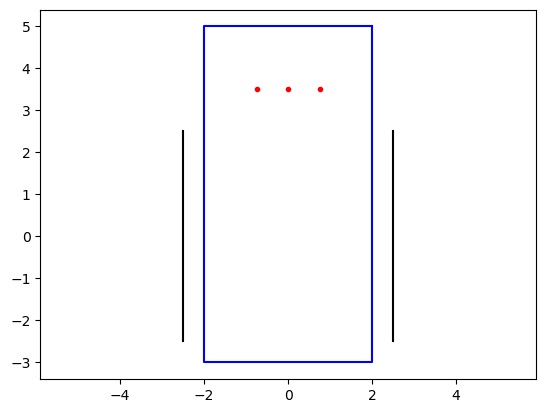

In [3]:
plot_robot()

### Where am I?

You can read the position and orientation:

- `position_x()` returns the position along the x axis in cm
- `position_y()` returns the position along the y axis in cm
- `orientation()` returns the angle in radians of the pointing (wheel) direction, clockwise from the y axis

They all start from 0 on start-up, i.e. robot pointing along y axis.

In [4]:
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())

X 0.0
Y 0.0
orientation 0.0


### Moving the robot

The `drive` statement moves the robot by commanding each wheel to turn a certain amount, in this case calibrated such that 1 unit of drive moves the tread of the wheel by 1cm.  Hence `drive(20.0,20.0)` should move use 20cm forwards, which means along the y axis from the starting point.

In [5]:
drive(20.0,20.0)
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())

X 0.0
Y 19.999999999999993
orientation 0.0


(I did warn you it won't go exactly where you ask.)

You can turn the robot on the spot by giving equal but opposite commands to each wheel.  Remembering $\ell - R\theta$ relates arc length $\ell$ to angle $\theta$, then each wheel must turn by $2.5\theta$ cm to rotate by angle theta.  Let's try $45^o = \frac{\pi}{4}$ rad.

In [6]:
from math import pi
dist = 2.5*pi/4.0
drive(dist,-dist)
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())

X 0.0
Y 19.999999999999993
orientation 0.785398163397449


Now let's drive in a big arc, moving both wheels forward but left fast than right, and finally use the `plot_path()` statement to see where we have been altogether.

X 16.053362193301574
Y 24.88505738233867
orientation 1.7853981633974498


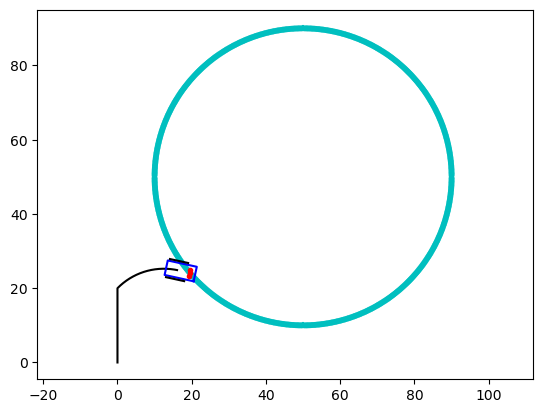

In [7]:
drive(20.0,15.0)
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())
plot_path()

The path (black line) shows what we expected - straight up the y-axis for 20cm, then turn on the spot $45^o$, then finally an arc curving to the right, as the left wheel was turning faster. 

### Line sensors

As you can see in the plot above, there is a circular line marked out in the robot's world (the green/blue circle).  It is centred at point (50,50) with radius 40cm and thickness 1cm.   Functions `sensor_left()`, `sensor_middle()` and `sensor_right()` will return `True` if they are on the line or `False` otherwise.

In [8]:
print('Left',sensor_left())
print('Middle',sensor_middle())
print('Right',sensor_right())

Left False
Middle True
Right False


### Going home

By default the robot will remember its position and move from where the last command was issued.  For example, try running the cell below multiple times - and notice the effects are cumulative.

Left False
Middle False
Right False


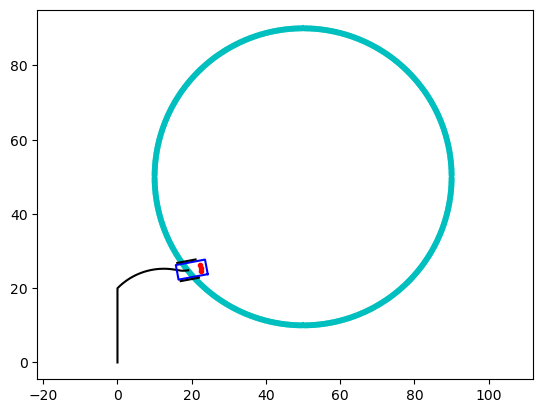

In [9]:
drive(2.0,4.0)
print('Left',sensor_left())
print('Middle',sensor_middle())
print('Right',sensor_right())
plot_path()

This can make development harder if you want to try something again, but you've already moved out of your starting position.  You can use the `reset_robot()` statement to send your robot home and start again.

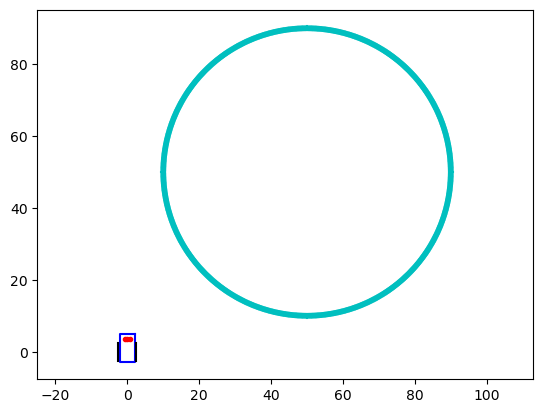

In [10]:
reset_robot()
plot_path()

Also, if you want to test from a specific starting location, you can give it a starting position using `reset_robot(x,y,angle_in_radians)`.

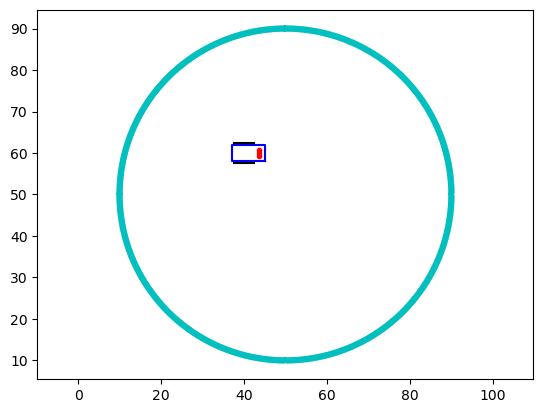

In [11]:
reset_robot(40,60,pi/2.0)
plot_path()

## Demo

Here's one I made earlier - the simulator has a built-in demo that does the following steps:

1. Starting from the origin, drive in an arc until the line is detected.
2. Follow the line until reaching y=75
3. Turn on the stop to point parallel to the x-axis (using proportional control, `turn = -K*angle_error`)
4. Drive forward to x=50

I'm not going to say how this is done, but hope instead to illustrate a possible combination of tactics for navigation.

found line
right a bit
pivot left
left a bit
pivot left
straight
pivot left
straight
left a bit
straight
left a bit
straight
straight
left a bit
straight
straight
right a bit
straight
straight
straight
right a bit
straight
straight
straight
right a bit
straight
straight
straight
right a bit
straight
straight
straight
straight
right a bit
straight
straight
right a bit
straight
straight
straight
straight
right a bit
straight
straight
straight
straight
right a bit
straight
straight
right a bit
straight
Angle 0.649999999999961 error -0.9207963267949355
Angle 0.7420796326794536 error -0.8287166941154429
Angle 0.8249513020909975 error -0.745845024703899
Angle 0.8995358045613848 error -0.6712605222335117
Angle 0.9666618567847334 error -0.6041344700101632
Angle 1.027075303785751 error -0.5437210230091456
Angle 1.0814474060866657 error -0.4893489207082309
Angle 1.1303822981574834 error -0.4404140286374132
Angle 1.1744237010212204 error -0.39637262577367616
Angle 1.2140609635985837 error -0.3567

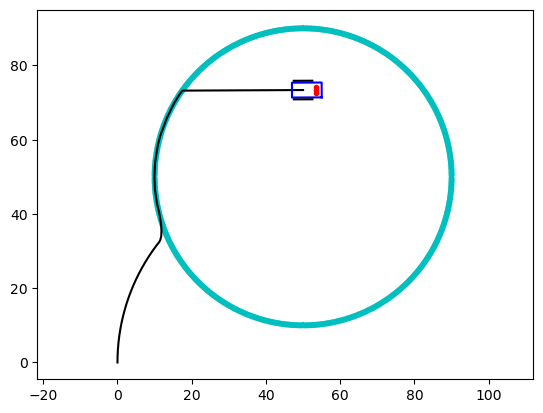

In [12]:
%run cpa_robot.py

## Control

Another example - let's follow the line $x=5$.  One way of doing this is to execute a simple proportional steering law, $\kappa = K(5-x_{pos})$ where $K$ is a gain constant and $x_{pos}$ is the current position in $x$.  Let's see what happens...

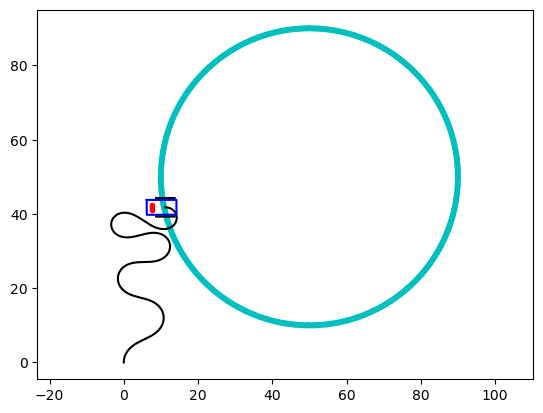

In [13]:
reset_robot()
target_x = 5.0
gain = 0.1
for ii in range(100):
    error_x = target_x - position_x()
    steer = gain*error_x
    drive(1.0+steer,1.0-steer)
plot_path()

Not good!  That's gone unstable.  The analysis of why that happens is a control problem, covered another time.  It turns out you can fix it by simply looking ahead, so don't take the _current_ position but look a bit ahead of the robot.  Here's the updated code, using $D\sin(\theta)$ as the extra lookahead term given a lookahead distance $D$ and the orientation angle $\theta$.

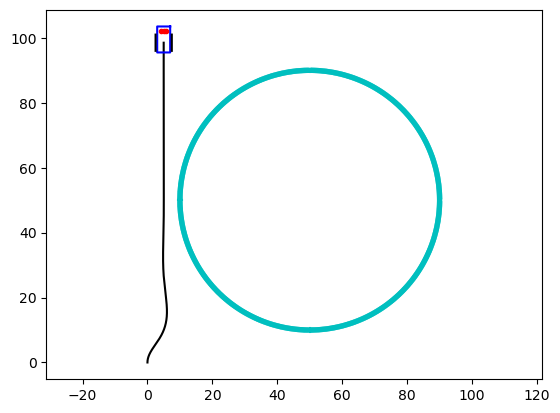

In [14]:
from math import sin
reset_robot()
target_x = 5.0
gain = 0.1
look_ahead = 5.0
for ii in range(100):
    look_ahead_x = position_x() + look_ahead*(sin(orientation()))
    error_x = target_x - look_ahead_x
    steer = gain*error_x
    drive(1.0+steer,1.0-steer)
plot_path()

It works...!

## Assignment

Your assignment is to undertake one or more challenges with the robot.  You should always start from the origin, _i.e._ from `reset_robot()` and must not use further `reset_robot(...)` calls to just teleport the robot around.

You can frame your own challenge, but here are some ideas:

- Navigate to both bottom (50,10) and top (50,90) of the circle but avoiding (90,50) _i.e._ not just going right round the circle
- Navigate to (100,100) but stay more than 30cm from the circle centre at (50,50)
- Pass within 20cm of every point in the square from (0,0) to (100,100) _e.g._ drive a search pattern
- Randomly search everywhere *outside* the circle

If you devise your own challenge, try to include a mix of line sensing and position sensing.

You can use the cell below and add others to develop your code.

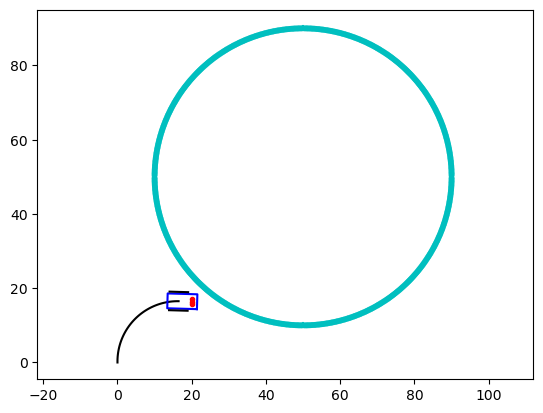

In [15]:
reset_robot()
drive(30.0,22.0)
plot_path()

*Submission* edit the file `robot_challenge.py` in two ways:
- edit the comment to make clear what challenge you have chosen
- edit the code so it runs your challenge

Test it below and then submit it via Blackboard.

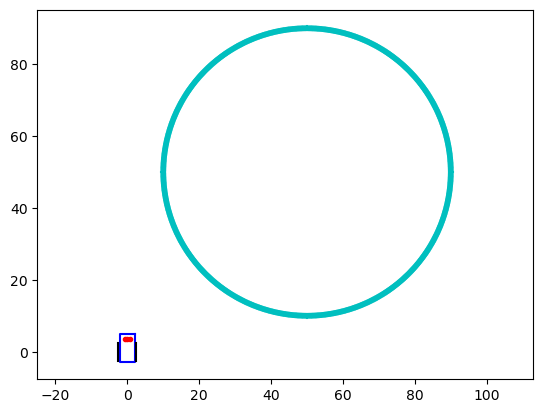

In [16]:
%run robot_challenge.py